<a href="https://colab.research.google.com/github/ale-camer/Mathematics/blob/Finance/Intro_to_Linear_Algebra_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algebra is arithmetic, which is the study of the properties of the traditional operations on numbers, that includes non-numerical entities like *x*.

Linear Algebra is solving unknowns within systems of linear equations.

In this notebook we will have a theoric introduction to linear algebra for data science. This include the following topics:

- Dimensions
- Types of Matrices
- Vector and Matrix Operations
- Vector Norms
- Matrix Decomposition

# Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy as sp
np.set_printoptions(suppress=True)

from PIL import Image
from matplotlib import pyplot as plt

# Dimensions

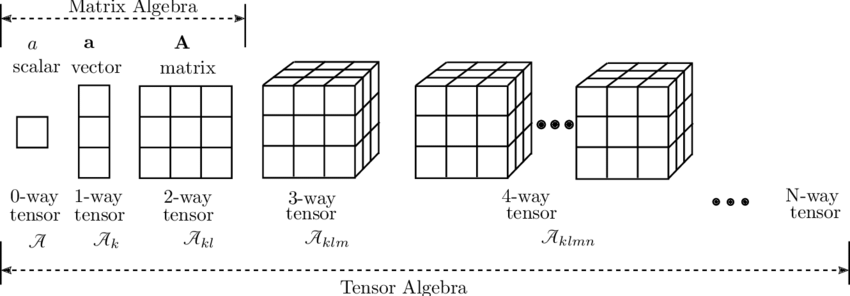

In [ ]:
url = "/content/Tensors-as-generalizations-of-scalars-vectors-and-matrices.png"
im = Image.open(url)
im.show()

Definitions:
- Scalar ($x$): single number
- Vector ($\vec{v}$): collection of scalar numbers
- Matrix ($A_{n,m}$): collection of vectors
- 3D Tensor ($T_{n,m,p}$): collection of matrices

By understanding how vector and matrices works we can extrapolate their operations to higher dimensions. Therefore, it's important to introduce the concept of linear combination which is an expression constructed from a set of terms by multiplying each term by a constant and adding the results. It's just a weighted sum.

For example, let's say we have the following vectors:

$\vec{v}_1 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix},  
\vec{v}_2 = \begin{bmatrix} 3 \\ 5 \\ 1 \end{bmatrix}
\vec{v}_3 = \begin{bmatrix} 0 \\ 0 \\ 8 \end{bmatrix}$

and that the linear combination of $\vec{v}_1,\vec{v}_2,\vec{v}_3$ is the vector $\vec{b} = \begin{bmatrix} 3 \\ 6 \\ 9 \end{bmatrix}$

This would be written the following way:

$\begin{bmatrix} 3 \\ 6 \\ 9 \end{bmatrix} =
\alpha_1 \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} +
\alpha_2 \begin{bmatrix} 3 \\ 5 \\ 1 \end{bmatrix} +
\alpha_3 \begin{bmatrix} 0 \\ 0 \\ 8 \end{bmatrix}$

or:

$\vec{b} = \alpha_1 \vec{v}_1 + \alpha_2 \vec{v}_2 + \alpha_3 \vec{v}_3$

The solution to this problem is the vector
$\alpha = \begin{bmatrix} 3 \\ 0 \\ 0 \end{bmatrix}$ and we can confirm this by doing the dot product of the vectors, by putting them into a matrix, and the vector solution which will yield the expected result.

In [ ]:
vector1, vector2, vector3 = np.array([1,2,3]), np.array([3,5,1]), np.array([0,0,8])
matrix = np.array([vector1,vector2,vector3]).T
vector = np.array([3,0,0])
print(f"Matrix: \n{matrix} \nVector solution: {vector}")
print(f"\nDot Product: \n{matrix@vector}")

Matrix: 
[[1 3 0]
 [2 5 0]
 [3 1 8]] 
Vector solution: [3 0 0]

Dot Product: 
[3 6 9]



# Types of matrices

A system of linear equations is a set of two or more linear equations with unknown variables, in this case $x$ and $y$, that are considered together.

The variables and the results represented all together in a matrix is called an augmented matrix. This is use in order to find it's solution.

Therefore, a system can be:

- Inconsistent: is when a system has no solution.
- Consistent: is when the system has a solution. In this case we have to type of systems:
 - Independent: when it has one solution.
 - Dependent: when it has infinite solutions.

Depending on the number of variables and equations a system can be clasified as:

- Square: when it has the same number of variables and equations.
- Rectangular: when it has different number of variables and equations. In this case it's also clasified as:
 - Overdetermined: it has more equations than variables.
 - Underdetermined: it has more variables than equations.


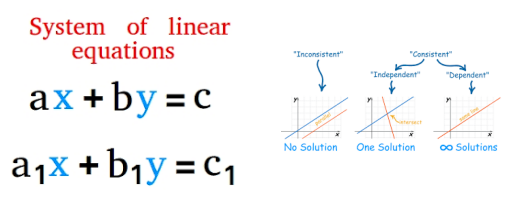

In [ ]:
url1, url2 = "/content/system_linear_equations.png", "/content/type_system_linear_equations.png"
im1, im2 = Image.open(url1), Image.open(url2)

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(im1)
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(im2)
plt.show()

## Square Matrix

Is a matrix with the same number of rows and columns. For example, this is a two by two matrix:

$A_{2,2} =
\begin{pmatrix}
 a_{1,1} & a_{1,2} \\
 a_{2,1} & a_{2,2} \\
\end{pmatrix}$

In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)

print(f"Matrix: \n\n {matrix} \n")
print(f" Number of rows: {matrix.shape[0]} \n Number of columns: {matrix.shape[1]} \n")
if matrix.shape[0] == matrix.shape[1]: print("Is a square matrix")
else: print("Is not a square matrix")

Matrix: 

 [[ 36.  29.   2.  89.  24.]
 [ 71.  78.  11.  40.  86.]
 [ 66.  38.  81.  29.  94.]
 [ 38. 100.  89.  41.  14.]
 [ 58.   9.  21.  75.  14.]] 

 Number of rows: 5 
 Number of columns: 5 

Is a square matrix


## Triangular Matrix

A triangular matrix is a type of square matrix that has all values in the upper-right or lower-left of the matrix with the remaining elements filled with zero values.

A triangular matrix with values only above the main diagonal is called an upper triangular matrix. Whereas,
a triangular matrix with values only below the main diagonal is called a lower triangular matrix.

In [ ]:
print(f"upper triangular matrix: \n\n {np.triu(matrix)} \n\n".title())
print(f"lower triangular matrix: \n\n {np.tril(matrix)}".title())

Upper Triangular Matrix: 

 [[36. 29.  2. 89. 24.]
 [ 0. 78. 11. 40. 86.]
 [ 0.  0. 81. 29. 94.]
 [ 0.  0.  0. 41. 14.]
 [ 0.  0.  0.  0. 14.]] 


Lower Triangular Matrix: 

 [[ 36.   0.   0.   0.   0.]
 [ 71.  78.   0.   0.   0.]
 [ 66.  38.  81.   0.   0.]
 [ 38. 100.  89.  41.   0.]
 [ 58.   9.  21.  75.  14.]]


## Diagonal Matrix

It's a matrix where the values outside of the main diagonal are zero. The main diagonal is taken from the top left of the matrix to the bottom right of it and it's represented like this $D$.

In [ ]:
print(f"Diagonal matrix: \n\n {np.diag(matrix[:,0])}".title())

Diagonal Matrix: 

 [[36.  0.  0.  0.  0.]
 [ 0. 71.  0.  0.  0.]
 [ 0.  0. 66.  0.  0.]
 [ 0.  0.  0. 38.  0.]
 [ 0.  0.  0.  0. 58.]]


## Transposed Matrix

It's a matrix in which the elements of the rows and columns have switched their positions, that is the rows have turned into columns and the columns into rows. It's represented like this $A^t$.

In [ ]:
print(f"Original matrix: \n\n {matrix} \n\n")
print(f"Transposed matrix: \n\n {matrix.T}")

Original matrix: 

 [[ 36.  29.   2.  89.  24.]
 [ 71.  78.  11.  40.  86.]
 [ 66.  38.  81.  29.  94.]
 [ 38. 100.  89.  41.  14.]
 [ 58.   9.  21.  75.  14.]] 


Transposed matrix: 

 [[ 36.  71.  66.  38.  58.]
 [ 29.  78.  38. 100.   9.]
 [  2.  11.  81.  89.  21.]
 [ 89.  40.  29.  41.  75.]
 [ 24.  86.  94.  14.  14.]]


## Symmetric Matrix

It's a type of square matrix where the top-right triangle is the same as the bottom-left triangle. In order for this to happen,
the axis of symmetry is always the main diagonal of the matrix, from the top left to the bottom right.

A symmetric matrix is always equal to it's transpose: $A^t = A$

A good example of this is the correlation matrix (explained later).

In [ ]:
print(f"Correlation matrix: \n\n {np.round(np.corrcoef(matrix),2)} \n\n")
print(f"Transposed matrix: \n\n {np.round(np.corrcoef(matrix),2).T}")

Correlation matrix: 

 [[ 1.    0.04 -0.73 -0.37  0.8 ]
 [ 0.04  1.    0.05 -0.4  -0.24]
 [-0.73  0.05  1.   -0.33 -0.47]
 [-0.37 -0.4  -0.33  1.   -0.41]
 [ 0.8  -0.24 -0.47 -0.41  1.  ]] 


Transposed matrix: 

 [[ 1.    0.04 -0.73 -0.37  0.8 ]
 [ 0.04  1.    0.05 -0.4  -0.24]
 [-0.73  0.05  1.   -0.33 -0.47]
 [-0.37 -0.4  -0.33  1.   -0.41]
 [ 0.8  -0.24 -0.47 -0.41  1.  ]]


## Identity Matrix

It's a type of square matrix full of zeros with ones in the main diagonal.

When a matrix is multiplied by an identity matrix it remains unchanged.

It's represented like this $I_n$ where "n" represent the number of columns and rows.

In [ ]:
print(f"Original matrix: \n\n {matrix} \n\n")
print(f"Identity matrix: \n\n {np.identity(5)} \n\n")
print(f"Multiplication: \n\n {matrix @ np.identity(5)}")

Original matrix: 

 [[ 36.  29.   2.  89.  24.]
 [ 71.  78.  11.  40.  86.]
 [ 66.  38.  81.  29.  94.]
 [ 38. 100.  89.  41.  14.]
 [ 58.   9.  21.  75.  14.]] 


Identity matrix: 

 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 


Multiplication: 

 [[ 36.  29.   2.  89.  24.]
 [ 71.  78.  11.  40.  86.]
 [ 66.  38.  81.  29.  94.]
 [ 38. 100.  89.  41.  14.]
 [ 58.   9.  21.  75.  14.]]


## Inverse Matrix

The inverse of a matrix, if exist, is a matrix that if it is multiplied
by the original matrix gives the identity matrix as a result.

In other words, $A^{-1} . A = I$

In [ ]:
print(f"Original matrix: \n\n {matrix} \n\n")
print(f"Inverse matrix: \n\n {np.linalg.inv(matrix)} \n\n")
print(f"Multiplication: \n\n {np.linalg.inv(matrix) @ matrix}")

Original matrix: 

 [[ 36.  29.   2.  89.  24.]
 [ 71.  78.  11.  40.  86.]
 [ 66.  38.  81.  29.  94.]
 [ 38. 100.  89.  41.  14.]
 [ 58.   9.  21.  75.  14.]] 


Inverse matrix: 

 [[-0.02704151  0.01132018 -0.00773067 -0.00069809  0.02942264]
 [ 0.00092168  0.00757524 -0.00730539  0.00716017 -0.00622333]
 [ 0.00000568 -0.01019967  0.00870562  0.00469072 -0.00049735]
 [ 0.01838497 -0.00678337  0.00240603 -0.00045568 -0.00554693]
 [ 0.01293714 -0.00012873  0.01077553 -0.00630581 -0.01600278]] 


Multiplication: 

 [[ 1. -0. -0.  0. -0.]
 [-0.  1. -0.  0. -0.]
 [ 0.  0.  1.  0.  0.]
 [-0. -0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Orthogonal Matrix

It's a type of square matrix whose columns and rows are orthonormal unit vectors, which means that they are perpendicular and have a length of 1.

A matrix is orthogonal if its transpose is equal to its inverse:
$Q^T = Q^{-1}$

Another equivalence is that the dot product of the matrix with its transpose equal the identity matrix:
$Q . Q^T = I$

In [ ]:
print(f"Dot product of the matrix with its transpose: \n\n {matrix @ matrix.T} \n\n Identity matrix: \n\n {np.identity(matrix.shape[0])} \n\n")
if (matrix @ matrix.T == np.identity(matrix.shape[0])).all(): print("It's an orthogonal matrix")
else: print("It's not an orthogonal matrix")

Dot product of the matrix with its transpose: 

 [[10638. 10464.  8477.  8431.  9402.]
 [10464. 20242. 17785. 14321.  9255.]
 [ 8477. 17785. 22038. 16022.  9362.]
 [ 8431. 14321. 16022. 21242.  8244.]
 [ 9402.  9255.  9362.  8244.  9707.]] 

 Identity matrix: 

 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 


It's not an orthogonal matrix


#Vector and Matrix Operations

##Vector Addition

This is when each component of two vectors are added to each one in the same position. Therefore, vectors must have the same number of components. This means to be compatible.

The operation is the following:

$\alpha = \vec{a}_n \vec{b}_n$

$\begin{align}
\alpha = \sum_{i=1}^n a_i + b_i
\end{align}$

In [ ]:
vector_A, vector_B = np.random.randint(1,10,5), np.random.randint(1,10,5)
print(f"Vector A: {vector_A}")
print(f"Vector B: {vector_B}")

def vector_addition(vector_a,vector_b):
  assert len(vector_b) == len(vector_b), "Vectors must have the same length"
  return print(vector_a+vector_b)
print("\nVector addition with vectors of same length")
vector_addition(vector_A,vector_B)

print("\nVector addition with vectors of different length")
try:
  vector_addition(vector_A,np.random.randint(1,10,6))
except Exception as e:
  print(e)

Vector A: [8 5 4 2 4]
Vector B: [6 7 6 3 4]

Vector addition with vectors of same length
[14 12 10  5  8]

Vector addition with vectors of different length
operands could not be broadcast together with shapes (5,) (6,) 


##Vector Scaling

The operation is the following:

$\alpha = a\vec{v}_n$

In [ ]:
vector, scalar = np.random.randint(1,10,5), 3
print(f"Vector: {vector}")
print(f"Scalar: {scalar}")

def vector_scaling(vector,scalar):
  return print(vector*scalar)
print("\nVector Scaling")
vector_scaling(vector,scalar)

Vector: [4 7 6 7 2]
Scalar: 3

Vector Scaling
[12 21 18 21  6]


##Vector Dot Product

For this operation vectors must have the same length too. This operation is the following:

$\alpha = \vec{a}_n \vec{b}_n$

$\begin{align}
\alpha = \sum_{i=1}^n a_i b_i
\end{align}$


In [ ]:
vector_A, vector_B = np.random.randint(1,10,5), np.random.randint(1,10,5)
print(f"Vector A: {vector_A}")
print(f"Vector B: {vector_B}")

def vector_dot_product(vector_a,vector_b):
  assert len(vector_b) == len(vector_b), "Vectors must have the same length"
  return print(sum(vector_a*vector_b))
print("\nVector dot product with vectors of same length")
vector_dot_product(vector_A,vector_B)

print("\nVector dot product with vectors of different length")
try:
  vector_dot_product(vector_A,np.random.randint(1,10,6))
except Exception as e:
  print(e)

Vector A: [8 9 2 1 9]
Vector B: [9 2 4 3 5]

Vector dot product with vectors of same length
146

Vector dot product with vectors of different length
operands could not be broadcast together with shapes (5,) (6,) 


## Inner Product

For this to happen both vectors must have the same number of elements.

It's the product between a row vector and a column vector:

$A =   \begin{pmatrix} a_{1,1} & a_{1,2} & a_{1,3} \end{pmatrix} B =   \begin{pmatrix} b_{1,1} \\ b_{2,1} \\ b_{3,1} \end{pmatrix}$

$\alpha = A_{1,n}  B_{n,1}$

$\begin{align}
\alpha = \sum_{i=1}^n a_i b_i
\end{align}$



In [ ]:
vector_A, vector_B = np.random.randint(1,10,10), np.random.randint(1,10,10)
print(f"Vector A: {vector_A} \nVector B: {vector_B}")

def inner_product(vector_A, vector_B):
    assert len(vector_A) == len(vector_B), "The vectors must have the same number of elements"
    return print(np.dot(vector_A,vector_B.T))
print("\nInner product of vectors with same dimension")
inner_product(vector_A, vector_B)
print(sum(vector_A * vector_B))

print("\nInner product of vectors with different dimension")
try:
  inner_product(vector_A, np.random.randint(1,10,11))
except Exception as e:
  print(e)

Vector A: [7 8 9 1 2 1 7 6 9 3] 
Vector B: [8 9 9 1 4 1 6 9 4 5]

Inner product of vectors with same dimension
366
366

Inner product of vectors with different dimension
The vectors must have the same number of elements


##Outer Product

For this to happen both vectors must have the same number of elements.

It's the product between a row vector and a column vector:

$A =   \begin{pmatrix} a_{1,1} \\ a_{2,1} \\ a_{3,1} \end{pmatrix}
B =   \begin{pmatrix} b_{1,1} & b_{1,2} & b_{1,3} \end{pmatrix}$

$C = A_{n,1}  B_{1,n}$


In [ ]:
vector_A, vector_B = np.array(np.random.randint(1,10,10)).reshape((10,1)), np.random.randint(1,10,10).reshape((1,10))
print(f"Vector A: \n{vector_A} \nVector B: \n{vector_B}")

def outer_product(vector_A, vector_B):
    assert vector_A.shape[0] == vector_B.shape[1], "The vectors must have the same number of elements"
    return print(np.dot(vector_A,vector_B))
print("\nOuter product of vectors with same dimension")
outer_product(vector_A, vector_B)

print("\nOuter product of vectors with different dimension")
try:
  inner_product(vector_A, np.random.randint(1,11,11).reshape((1,11)))
except Exception as e:
  print(e)

Vector A: 
[[6]
 [4]
 [2]
 [1]
 [1]
 [1]
 [5]
 [8]
 [1]
 [1]] 
Vector B: 
[[8 5 1 8 7 5 6 8 4 1]]

Outer product of vectors with same dimension
[[48 30  6 48 42 30 36 48 24  6]
 [32 20  4 32 28 20 24 32 16  4]
 [16 10  2 16 14 10 12 16  8  2]
 [ 8  5  1  8  7  5  6  8  4  1]
 [ 8  5  1  8  7  5  6  8  4  1]
 [ 8  5  1  8  7  5  6  8  4  1]
 [40 25  5 40 35 25 30 40 20  5]
 [64 40  8 64 56 40 48 64 32  8]
 [ 8  5  1  8  7  5  6  8  4  1]
 [ 8  5  1  8  7  5  6  8  4  1]]

Outer product of vectors with different dimension
The vectors must have the same number of elements


##Matrix Addition

It can happen if and only if both matrices have the same size and it's element wise.

In other words, $A_{n,n} + B_{n,n} = C_{n,n}$

In [ ]:
matrix_A, matrix_B = np.round(np.random.rand(5,5) * 100,0), np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix A \n {matrix_A} \n\n Matrix B \n {matrix_B} \n\n")

def matrix_addition(matrix_A, matrix_B):
    assert matrix_A.shape == matrix_B.shape, "Matrices must have the same size"
    return print(matrix_A + matrix_B)

print("Addition with matrices of same dimensions")
matrix_addition(matrix_A, matrix_B)

print("\nAddition with matrices of different dimensions")
try:
  matrix_addition(matrix_A, np.random.rand(5,6))
except Exception as e:
  print(e)

Matrix A 
 [[75. 31. 33. 41. 49.]
 [68. 10. 84. 90.  1.]
 [12. 59. 59.  2.  8.]
 [ 4. 41. 25. 42. 50.]
 [91. 66. 17. 70.  1.]] 

 Matrix B 
 [[35. 85. 65. 29. 48.]
 [33. 30. 98. 19. 48.]
 [ 1. 38.  7. 99. 46.]
 [86. 87. 65. 97. 48.]
 [17. 64. 10. 50. 22.]] 


Addition with matrices of same dimensions
[[110. 116.  98.  70.  97.]
 [101.  40. 182. 109.  49.]
 [ 13.  97.  66. 101.  54.]
 [ 90. 128.  90. 139.  98.]
 [108. 130.  27. 120.  23.]]

Addition with matrices of different dimensions
Matrices must have the same size


##Matrix Scaling

It's element-wise too and it's called scaling.

$x . A_{2,2} =
\begin{pmatrix}
 x.a_{1,1} & x.a_{1,2} \\
 x.a_{2,1} & x.a_{2,2} \\
\end{pmatrix}$

In [ ]:
scalar, matrix = 5, np.round(np.random.rand(5,5) * 100,0)

print(f"Scalar: \n {scalar}")
print(f"\nMatrix: \n {matrix}\n")
def scalar_multiplication(scalar, matrix):
    return print(scalar * matrix)
print(f"Scaled matrix: ")
scalar_multiplication(scalar, matrix)

Scalar: 
 5

Matrix: 
 [[70. 32. 25. 33. 85.]
 [ 4. 49. 77. 89. 36.]
 [44. 63. 64. 51. 22.]
 [ 0. 39. 94. 51. 97.]
 [68. 25. 42. 24. 11.]]

Scaled matrix: 
[[350. 160. 125. 165. 425.]
 [ 20. 245. 385. 445. 180.]
 [220. 315. 320. 255. 110.]
 [  0. 195. 470. 255. 485.]
 [340. 125. 210. 120.  55.]]


## Matrix Product

We have a first matrix of dimensions n,m and a second matrix
of dimensions m,p and the result will be a matrix of dimensions n,p in which each element of the resulting matrix is the sumproduct between each column of the first matrix and each row of the second matrix:

$A_{n,m}B_{m,p}=C_{n,p}$

In [ ]:
matrix_A, matrix_B = np.round(np.random.rand(5,5) * 100,0), np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix A: \n{matrix_A}")
print(f"\nMatrix B: \n{matrix_B}")
def matrix_product(matrix_A, matrix_B):
    assert matrix_A.shape[1] == matrix_B.shape[0], "The first matrix columns and the second matrix rows must be have the same size"
    return print(np.dot(matrix_A,matrix_B))
print("\nMatrix product when properties are met")
matrix_product(matrix_A, matrix_B)

print("\nMatrix product when properties aren't met")
try:
  matrix_product(matrix_A, np.round(np.random.rand(4,5) * 100,0))
except Exception as e:
  print(e)

Matrix A: 
[[49. 57.  5. 13. 87.]
 [65. 76. 82. 79. 35.]
 [50. 14. 26. 56. 79.]
 [34. 80. 71. 72. 18.]
 [18. 45. 33. 68. 33.]]

Matrix B: 
[[41. 86. 91. 17. 78.]
 [69. 63. 96. 70. 73.]
 [97. 34. 86. 65. 96.]
 [30. 66. 37. 37. 63.]
 [63. 87. 41. 72.  9.]]

Matrix product when properties are met
[[12298. 16402. 14409. 11893. 10065.]
 [20438. 21425. 24621. 17198. 23782.]
 [12195. 16635. 13441. 11280. 11657.]
 [17095. 16696. 20282. 14753. 20006.]
 [11163. 12864. 12665. 10493. 12438.]]

Matrix product when properties aren't met
The first matrix columns and the second matrix rows must be have the same size


##Hadamard Product (element-wise product)

Is the element-wise product between two matrices. Therefore, they must have the same dimensiones:

$A_{n,n}B_{n,n}=C_{n,n}$

It's represented the following way:

$(A \circ B)_{i,j} = (A \odot B)_{i,j} = (A)_{i,j} (B)_{i,j}$

In [ ]:
matrix_A, matrix_B = np.round(np.random.rand(5,5) * 100,0), np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix A: \n{matrix_A}")
print(f"\nMatrix B: \n{matrix_B}")
print(f"\nHadamard Product: \n{matrix_A*matrix_B}")

Matrix A: 
[[50. 69.  7. 34. 19.]
 [42. 75. 65. 85. 59.]
 [ 3. 37. 88. 81. 84.]
 [20. 34.  2. 21. 89.]
 [10. 40. 19. 64. 79.]]

Matrix B: 
[[ 10.  82.  79.  30.  66.]
 [ 20.  12.  98.  89.  68.]
 [  8. 100.  95.  98.  21.]
 [ 57.  80.  88.  64.  24.]
 [ 61.  72.  98.  88.  41.]]

Hadamard Product: 
[[ 500. 5658.  553. 1020. 1254.]
 [ 840.  900. 6370. 7565. 4012.]
 [  24. 3700. 8360. 7938. 1764.]
 [1140. 2720.  176. 1344. 2136.]
 [ 610. 2880. 1862. 5632. 3239.]]


## Matrix-Vector Product

The number of columns of the matrix and the number of element of the vector must be the same:

$A_{n,m} = v_{m}$

In [ ]:
matrix, vector = np.round(np.random.rand(5,5) * 100,0), np.random.randint(1,10,5)
print(f"Matrix: \n{matrix} \n\n Vector: \n{vector}")
print(f"\nMatrix dimensions: ({matrix.shape[0]},{matrix.shape[1]}) \nVector length: {len(vector)}")

def matrix_vector_product(matrix,vector):
    assert matrix.shape[1] == len(vector), "the number of columns of the matrix and the number of element of the vector must be the same"
    return print(np.dot(matrix, vector))
print("\nMatrix-Vector Product with same dimensions")
matrix_vector_product(matrix,vector)

print("\nMatrix-Vector Product with different dimensions")
try:
  matrix_vector_product(matrix,np.random.randint(1,10,6))
except Exception as e:
  print(e)

Matrix: 
[[20. 99. 85. 90. 59.]
 [60. 22. 31. 56. 65.]
 [24. 68. 17. 54. 78.]
 [59. 12. 46. 77. 21.]
 [46. 84. 80. 50. 92.]] 

 Vector: 
[9 8 4 1 1]

Matrix dimensions: (5,5) 
Vector length: 5

Matrix-Vector Product with same dimensions
[1461.  961.  960.  909. 1548.]

Matrix-Vector Product with different dimensions
the number of columns of the matrix and the number of element of the vector must be the same


##  Matrix Trace

It's the sum of the elements of the main diagonal.

In [ ]:
print(f"Matrix: \n\n {matrix} \n\n")
print(f"Diagonal: {np.diag(matrix,k=0)}\n")
print(f"The trace of the matrix is: {np.trace(matrix)}\n")
print(f"Manual sum of the main diagonal elements: {np.sum(np.diag(matrix,k=0))}")

Matrix: 

 [[20. 99. 85. 90. 59.]
 [60. 22. 31. 56. 65.]
 [24. 68. 17. 54. 78.]
 [59. 12. 46. 77. 21.]
 [46. 84. 80. 50. 92.]] 


Diagonal: [20. 22. 17. 77. 92.]

The trace of the matrix is: 228.0

Manual sum of the main diagonal elements: 228.0


## Matrix  Determinant

It's the scalar representation of the volume of a matrix.

If it's equal to zero it cannot be inverted.

In [ ]:
print(f"Matrix: \n{matrix}")
print(f"\nDeterminant of a matrix: {np.linalg.det(matrix)}")
if np.linalg.det(matrix) == 0: print("Cannot be inverted")
else: print("Can be inverted")

Matrix: 
[[20. 99. 85. 90. 59.]
 [60. 22. 31. 56. 65.]
 [24. 68. 17. 54. 78.]
 [59. 12. 46. 77. 21.]
 [46. 84. 80. 50. 92.]]

Determinant of a matrix: -181421195.99999976
Can be inverted


## Matrix Rank

It's the estimate of the number of linearly independent rows or columns a matrix has.

In [ ]:
print(f"Matrix: \n{matrix}")
print(f"\nRank of the matrix: {np.linalg.matrix_rank(matrix)}")

Matrix: 
[[20. 99. 85. 90. 59.]
 [60. 22. 31. 56. 65.]
 [24. 68. 17. 54. 78.]
 [59. 12. 46. 77. 21.]
 [46. 84. 80. 50. 92.]]

Rank of the matrix: 5


#Vector Norms


Are functions that measure the magnitude or length of a vector and are  represented this way: $\| x \|$.

It has four properties:

- Non-Negativity: $\|x\| \ge 0$
- Definiteness: $\|x\| = 0 \Leftrightarrow x = 0$
- Triangle Inequality: $\|x + y\| \le \|x\| + \|y\|$
- Homogeneity: $\|\lambda x\| = |\lambda| \|x\|, \forall \lambda \in \mathbb{R}$

##Manhattan or $L^1$ norm

It's define the following way:

$\|x\|_1 = \begin{align} \sum_{i=1}^n |x_i| \end{align}, \forall x \in \mathbb{R}$

In [ ]:
vector = np.random.randint(1,10,10)
print(f"Vector: {vector}")

def manhattan_norm(vector):
    return sum(abs(vector))
print(f"Manhattan Norm calculated with Custom Function: {manhattan_norm(vector)}")
print(f"Manhattan Norm calculated with Numpy Function: {np.linalg.norm(vector,ord=1)}")

Vector: [2 3 1 1 2 8 1 8 2 3]
Manhattan Norm calculated with Custom Function: 31
Manhattan Norm calculated with Numpy Function: 31.0


##Euclidean or $L^2$ norm

It's define the following way:
$\|x\|_2 = \sqrt {\begin{align} \sum_{i=1}^n |x_i|^2 \end{align}}, \forall x \in \mathbb{R}$

In [ ]:
vector = np.random.randint(1,10,10)
print(f"Vector: {vector}")

def euclidean_norm(vector):
    return sum(vector**2)**(1/2)
print(f"Euclidean Norm calculated with Custom Function: {euclidean_norm(vector)}")
print(f"Euclidean Norm calculated with Numpy Function: {np.linalg.norm(vector,ord=2)}")

Vector: [1 8 1 8 7 1 7 8 3 2]
Euclidean Norm calculated with Custom Function: 17.4928556845359
Euclidean Norm calculated with Numpy Function: 17.4928556845359


##$L^p$ norm

It's define the following way:

$\|x_p\| = (\begin{align} \sum_{i=1}^n |x_i|^p)^{1/p} \end{align}, \forall p \ge 0$

In [ ]:
vector = np.random.randint(1,10,10)
print(f"Vector: {vector}")

def lp_norm(vector,p):
    return sum(vector**p)**(1/p)
print(f"L^p Norm calculated with Custom Function when P = 3: {lp_norm(vector,3)}")
print(f"L^p Norm calculated with Numpy Function when P = 3: {np.linalg.norm(vector,ord=3)}")

Vector: [2 2 4 3 9 1 9 7 6 9]
L^p Norm calculated with Custom Function when P = 3: 14.184629271615547
L^p Norm calculated with Numpy Function when P = 3: 14.184629271615547


##Max or $L^\infty$ norm

It's define the following way:

$\|x\|_\infty = max_i(|x|_i), \forall x \in \mathbb{R}$

In [ ]:
vector = np.random.randint(1,10,10)
print(f"Vector: {vector}")

def infinite_norm(vector):
    return max(abs(vector))
print(f"Infinite Norm calculated with Custom Function: {infinite_norm(vector)}")
print(f"Infinite Norm calculated with Numpy Function: {np.linalg.norm(vector,ord=np.inf)}")

Vector: [6 8 6 5 8 1 4 1 2 4]
Infinite Norm calculated with Custom Function: 8
Infinite Norm calculated with Numpy Function: 8.0


#Matrix Decomposition

Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations.

##LU

Factors a matrix as the product of a lower triangular matrix L and an upper triangular matrix U.

The mathematical definition is the following:

$A = LU$

$\begin{bmatrix}
 a_{1,1} & a_{1,2} & a_{1,3} \\
 a_{2,1} & a_{2,2} & a_{2,3} \\
 a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix} = \begin{bmatrix}
 l_{1,1} & 0 & 0 \\
 l_{2,1} & l_{2,2} & 0 \\
 l_{3,1} & l_{3,2} & a_{3,3}
\end{bmatrix} \begin{bmatrix}
 u_{1,1} & u_{1,2} & u_{1,3} \\
 0 & u_{2,2} & u_{2,3} \\
 0 & 0 & u_{3,3}
\end{bmatrix}$


In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix: \n{matrix}")

L, U = sp.linalg.lu(matrix,True)
print(f"\nL matrix: \n{L}")
print(f"\nU matrix: \n{U}")
print(f"\nDot Product: \n{L@U}")

Matrix: 
[[95. 30.  5. 18.  1.]
 [95. 15. 58. 62.  4.]
 [62. 59. 46. 66. 18.]
 [94. 20.  7. 15. 35.]
 [22. 13. 43. 88. 16.]]

L matrix: 
[[ 1.          0.          0.          0.          0.        ]
 [ 1.         -0.38050734  1.          0.          0.        ]
 [ 0.65263158  1.          0.          0.          0.        ]
 [ 0.98947368 -0.24566088  0.18121711 -0.02812272  1.        ]
 [ 0.23157895  0.15353805  0.50937795  1.          0.        ]]

U matrix: 
[[95.         30.          5.         18.          1.        ]
 [ 0.         39.42105263 42.73684211 54.25263158 17.34736842]
 [ 0.          0.         69.26168224 64.6435247   9.60080107]
 [ 0.          0.          0.         42.57374945  8.21450354]
 [ 0.          0.          0.          0.         36.76328091]]

Dot Product: 
[[95. 30.  5. 18.  1.]
 [95. 15. 58. 62.  4.]
 [62. 59. 46. 66. 18.]
 [94. 20.  7. 15. 35.]
 [22. 13. 43. 88. 16.]]


##QR

Is a decomposition of a matrix into the product of an orthonormal matrix Q and an upper triangular matrix R.

The mathematical definition is the following:

$A = QR$

In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix: \n{matrix}")

Q, R = np.linalg.qr(matrix)
print(f"\nQ matrix: \n{Q}")
print(f"\nR matrix: \n{R}")
print(f"\nDot Product: \n{Q@R}")

Matrix: 
[[56. 87. 53.  2. 61.]
 [71. 99. 12. 62. 73.]
 [15. 28. 75. 55. 95.]
 [73. 88. 44. 17. 75.]
 [36. 85. 47. 57. 48.]]

Q matrix: 
[[-0.45682713  0.14908996 -0.15279219 -0.6760179  -0.53734115]
 [-0.57919153 -0.1045249   0.44063215  0.56563919 -0.3735068 ]
 [-0.12236441  0.16189937 -0.85102394  0.45102669 -0.17649002]
 [-0.59550679 -0.46555768 -0.20178892 -0.13749141  0.60745787]
 [-0.29367458  0.85081806  0.13242863  0.02689147  0.41425037]]

R matrix: 
[[-122.58466462 -177.87706209  -80.34447074  -70.41663838 -140.53144456]
 [   0.           38.50650311   38.29383273   43.30425012   22.76705074]
 [   0.            0.          -69.29176283  -15.67468777  -66.7790462 ]
 [   0.            0.            0.           57.71952117   33.88103867]
 [   0.            0.            0.            0.          -11.36700038]]

Dot Product: 
[[56. 87. 53.  2. 61.]
 [71. 99. 12. 62. 73.]
 [15. 28. 75. 55. 95.]
 [73. 88. 44. 17. 75.]
 [36. 85. 47. 57. 48.]]


##Cholesky

Is a decomposition of a Hermitian positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose.

The mathematical definition is the following:

$A = LL^*$

where L is a lower triangular matrix with real and positive diagonal entries, and L* denotes the conjugate transpose of L. Every Hermitian positive-definite matrix (and thus also every real-valued symmetric positive-definite matrix) has a unique Cholesky decomposition.

In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)
matrix = np.cov(matrix)
print(f"Matrix: \n{matrix}")

while True:
  try:
    L = np.linalg.cholesky(matrix)
    print(f"\nL matrix: \n{L}")
    print(f"\nDot Product: \n{L@L.T}")
    break
  except Exception as e:
    print(e)

Matrix: 
[[ 477.2   219.5  -473.2   -35.7   366.1 ]
 [ 219.5  1316.5   502.75  303.75  976.25]
 [-473.2   502.75 1000.7   131.45   90.15]
 [ -35.7   303.75  131.45  365.7    13.9 ]
 [ 366.1   976.25   90.15   13.9  1018.3 ]]

L matrix: 
[[ 21.84490787   0.           0.           0.           0.        ]
 [ 10.04810829  34.86453097   0.           0.           0.        ]
 [-21.66179884  20.66312325  10.22261261   0.           0.        ]
 [ -1.63424814   9.1832901   -9.16656175  13.95243927   0.        ]
 [ 16.75905443  23.17120534  -2.50505494 -13.93750471   0.00000058]]

Dot Product: 
[[ 477.2   219.5  -473.2   -35.7   366.1 ]
 [ 219.5  1316.5   502.75  303.75  976.25]
 [-473.2   502.75 1000.7   131.45   90.15]
 [ -35.7   303.75  131.45  365.7    13.9 ]
 [ 366.1   976.25   90.15   13.9  1018.3 ]]


##Eigen

Is the factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its eigenvalues and eigenvectors. Only diagonalizable matrices can be factorized in this way.

The mathematical definition is the following:

$A \vec{v} = \lambda \vec{v}$

where $\lambda$ is a scalar which is the eigen value corresponding the eigenvector $\vec{v}$.

In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)
# matrix = np.cov(matrix)
print(f"Matrix: \n{matrix}")

eigenvalues, eigenvectors = np.linalg.eig(matrix)
print(f"\nEigenvalues: \n{np.real(np.round(eigenvalues))}")
print(f"\nEigenvectors: \n{np.real(np.round(eigenvectors))}")
print(f"\nMatrix Reconstruction: \n{np.real(np.round(eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors)))}")

Matrix: 
[[92. 33. 23. 20. 89.]
 [20. 64. 81. 33. 42.]
 [84. 88. 75. 34. 18.]
 [47. 30. 67. 37. 68.]
 [21.  5. 57. 81. 10.]]

Eigenvalues: 
[247. -41.   4.   4.  63.]

Eigenvectors: 
[[-0.  0.  0.  0. -1.]
 [-0.  0. -0. -0.  1.]
 [-1. -1.  1.  1.  0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]]

Matrix Reconstruction: 
[[92. 33. 23. 20. 89.]
 [20. 64. 81. 33. 42.]
 [84. 88. 75. 34. 18.]
 [47. 30. 67. 37. 68.]
 [21.  5. 57. 81. 10.]]


##Singular Value

Is the factorization of a matrix into the product of three matrices U, D and V where the columns of U and V are orthonormal and the matrix D is diagonal with positive real entries.

The mathematical definition is the following:

$A = UDV^T$

In [ ]:
matrix = np.round(np.random.rand(5,5) * 100,0)
print(f"Matrix: \n{matrix}")

U, D, V = np.linalg.svd(matrix)
print(f"\nU Matrix: \n{U}")
print(f"\nD Vector: \n{D}")
print(f"\nV Matrix: \n{V}")
print(f"\nMatrix Reconstruction: \n{(U * D) @ V}")

Matrix: 
[[22. 65. 31. 84. 41.]
 [22. 79. 65. 44.  5.]
 [70.  4. 97. 81. 24.]
 [70. 44. 12. 14.  4.]
 [97. 68. 85.  6. 96.]]

U Matrix: 
[[-0.39399068 -0.47104343  0.42421042 -0.35272734  0.56437432]
 [-0.38196173 -0.32081393  0.42589065  0.20477855 -0.72654426]
 [-0.49759536 -0.36526121 -0.78222537  0.08342259 -0.01213422]
 [-0.26036685  0.19046052  0.16122174  0.84884142  0.38653548]
 [-0.61926128  0.71098914  0.02817233 -0.32581909 -0.06370367]]

D Vector: 
[258.76151697  94.79915425  77.40190162  51.10940605  43.98149528]

V Matrix: 
[[-0.50315307 -0.43028292 -0.5451722  -0.37705553 -0.34972846]
 [ 0.41465598 -0.00733808 -0.08613986 -0.8052523   0.41491594]
 [-0.28468699  0.86689877 -0.3968008  -0.08476862  0.05294576]
 [ 0.59478594  0.1717344  -0.13775304 -0.07694758 -0.76931148]
 [ 0.37427317 -0.18383847 -0.7203752   0.44304765  0.33300356]]

Matrix Reconstruction: 
[[22. 65. 31. 84. 41.]
 [22. 79. 65. 44.  5.]
 [70.  4. 97. 81. 24.]
 [70. 44. 12. 14.  4.]
 [97. 68. 85.  6. 96.]]